In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_df = pd.read_csv('train.csv')
# Add ID column and calculate PRICE_PER_SQM
train_df['ID'] = range(1, len(train_df) + 1)
train_df['PRICE_PER_SQM'] = train_df['RESALE_PRICE'] / train_df['FLOOR_AREA_SQM']
print(train_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK              STREET FLOOR_RANGE  \
0  2020-10      woodlands    4 room  681B  woodlands drive 62    07 to 09   
1  2021-07         bishan    4 room   264    bishan street 24    07 to 09   
2  2021-05  bukit panjang    4 room   520       jelapang road    19 to 21   
3  2021-08        punggol    4 room  121B     edgedale plains    16 to 18   
4  2023-05        hougang    5 room  997B   Buangkok Crescent    10 to 12   

   FLOOR_AREA_SQM         FLAT_MODEL   ECO_CATEGORY  LEASE_COMMENCE_DATA  \
0           102.0  premium apartment  uncategorized                 2000   
1           104.0            model a  uncategorized                 1992   
2           102.0            model a  uncategorized                 1998   
3            93.0            model a  uncategorized                 2017   
4           113.0           improved  uncategorized                 2018   

   RESALE_PRICE  ID  PRICE_PER_SQM  
0      420000.0   1    4117.647059  
1     

In [2]:
test_df = pd.read_csv('test.csv')
# Add ID column
test_df['ID'] = range(1, len(test_df) + 1)
print(test_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK            STREET FLOOR_RANGE  \
0  2025-06      sembawang    3 room  115D     Canberra Walk    04 to 06   
1  2020-01    bukit merah    4 room  118A     jalan membina    01 to 03   
2  2025-06         bishan    3 room    22     Sin Ming Road    10 to 12   
3  2022-10        hougang    4 room   635  Hougang Avenue 8    10 to 12   
4  2024-02  bukit panjang    4 room   275      bangkit road    10 to 12   

   FLOOR_AREA_SQM  FLAT_MODEL   ECO_CATEGORY  LEASE_COMMENCE_DATA  ID  
0            68.0     model a  uncategorized                 2018   1  
1            90.0     model a  uncategorized                 2003   2  
2            68.0    improved  uncategorized                 1973   3  
3            84.0  simplified  uncategorized                 1987   4  
4           104.0     model a  uncategorized                 1988   5  


In [3]:
record_count = len(train_df)
print(f"There are {record_count} records in the training dataset.")

missing_values = train_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

There are 162691 records in the training dataset.
Missing values in each column:
MONTH                  0
TOWN                   0
FLAT_TYPE              0
BLOCK                  0
STREET                 0
FLOOR_RANGE            0
FLOOR_AREA_SQM         0
FLAT_MODEL             0
ECO_CATEGORY           0
LEASE_COMMENCE_DATA    0
RESALE_PRICE           0
ID                     0
PRICE_PER_SQM          0
dtype: int64


In [5]:
record_count = len(test_df)
print(f"There are {record_count} records in the testing dataset.")

missing_values = test_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

There are 50000 records in the testing dataset.
Missing values in each column:
MONTH                  0
TOWN                   0
FLAT_TYPE              0
BLOCK                  0
STREET                 0
FLOOR_RANGE            0
FLOOR_AREA_SQM         0
FLAT_MODEL             0
ECO_CATEGORY           0
LEASE_COMMENCE_DATA    0
ID                     0
dtype: int64


In [8]:
unique_towns = train_df['TOWN'].unique()
print(f"There are {len(unique_towns)} unique values in the TOWN field",'\n')
print(unique_towns,'\n')

unique_type = train_df['FLAT_TYPE'].unique()
print(f"There are {len(unique_type)} unique values in the FLAT_TYPE field",'\n')
print(unique_type,'\n')

unique_street = train_df['STREET'].unique()
print(f"There are {len(unique_street)} unique values in the STREET field",'\n')

unique_model = train_df['FLAT_MODEL'].unique()
print(f"There are {len(unique_model)} unique values in the STREET field",'\n')
print(unique_model,'\n')

eco_category_counts = train_df['ECO_CATEGORY'].value_counts(normalize=True)
eco_category_unique = train_df['ECO_CATEGORY'].nunique()
print(f"There are {eco_category_unique} unique values in the ECO_CATEGORY field",'\n')


There are 26 unique values in the TOWN field 

['woodlands' 'bishan' 'bukit panjang' 'punggol' 'hougang' 'clementi'
 'bedok' 'yishun' 'sengkang' 'queenstown' 'bukit batok' 'pasir ris'
 'toa payoh' 'geylang' 'tampines' 'bukit merah' 'ang mo kio' 'sembawang'
 'choa chu kang' 'jurong west' 'kallang/whampoa' 'serangoon'
 'central area' 'jurong east' 'marine parade' 'bukit timah'] 

There are 12 unique values in the FLAT_TYPE field 

['4 room' '5 room' '3 room' '5-room' '3-room' 'executive' '4-room'
 '2-room' '2 room' '1 room' 'multi generation' '1-room'] 

There are 1145 unique values in the STREET field 

There are 21 unique values in the STREET field 

['premium apartment' 'model a' 'improved' 'new generation' 'standard'
 'maisonette' 'dbss' 'simplified' 'apartment' 'model a2' 'type s1'
 'adjoined flat' 'model a maisonette' 'type s2' '3gen' '2 room' 'terrace'
 'premium apartment loft' 'premium maisonette' 'multi generation'
 'improved maisonette'] 

There are 1 unique values in the ECO_C

In [9]:
unique_towns = test_df['TOWN'].unique()
print(f"There are {len(unique_towns)} unique values in the TOWN field",'\n')
print(unique_towns,'\n')

unique_type = test_df['FLAT_TYPE'].unique()
print(f"There are {len(unique_type)} unique values in the FLAT_TYPE field",'\n')
print(unique_type,'\n')

unique_street = test_df['STREET'].unique()
print(f"There are {len(unique_street)} unique values in the STREET field",'\n')

unique_model = test_df['FLAT_MODEL'].unique()
print(f"There are {len(unique_model)} unique values in the STREET field",'\n')
print(unique_model,'\n')

eco_category_counts = test_df['ECO_CATEGORY'].value_counts(normalize=True)
eco_category_unique = test_df['ECO_CATEGORY'].nunique()
print(f"There are {eco_category_unique} unique values in the ECO_CATEGORY field",'\n')

There are 26 unique values in the TOWN field 

['sembawang' 'bukit merah' 'bishan' 'hougang' 'bukit panjang' 'punggol'
 'jurong west' 'woodlands' 'yishun' 'pasir ris' 'tampines' 'clementi'
 'kallang/whampoa' 'sengkang' 'ang mo kio' 'bedok' 'bukit batok'
 'toa payoh' 'queenstown' 'serangoon' 'jurong east' 'geylang'
 'choa chu kang' 'central area' 'bukit timah' 'marine parade'] 

There are 12 unique values in the FLAT_TYPE field 

['3 room' '4 room' '5-room' '5 room' '4-room' 'executive' '3-room'
 '2 room' '2-room' '1-room' 'multi generation' '1 room'] 

There are 1133 unique values in the STREET field 

There are 21 unique values in the STREET field 

['model a' 'improved' 'simplified' 'apartment' 'premium apartment'
 'new generation' 'standard' 'maisonette' 'dbss' 'model a maisonette'
 'model a2' 'improved maisonette' 'type s1' '2 room' 'adjoined flat'
 '3gen' 'type s2' 'premium apartment loft' 'terrace' 'premium maisonette'
 'multi generation'] 

There are 1 unique values in the ECO_C

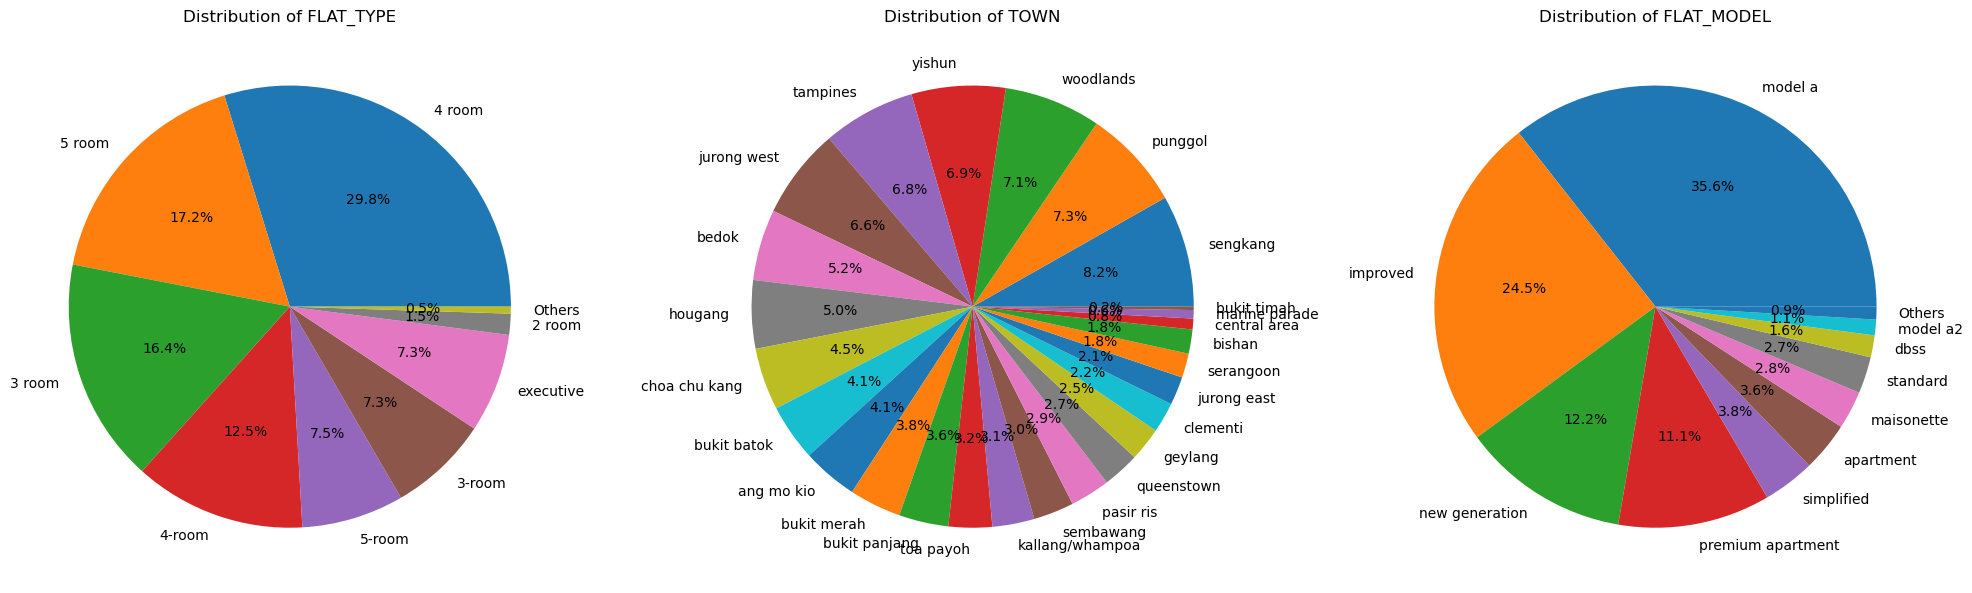


FLAT_TYPE distribution:
           count
FLAT_TYPE       
4 room     48459
5 room     27916
3 room     26702
4-room     20414
5-room     12167
3-room     11904
executive  11801
2 room      2503
Others       825

TOWN distribution:
                 count
TOWN                  
sengkang         13335
punggol          11925
woodlands        11506
yishun           11175
tampines         11030
jurong west      10781
bedok             8457
hougang           8120
choa chu kang     7397
bukit batok       6733
ang mo kio        6623
bukit merah       6184
bukit panjang     5891
toa payoh         5182
kallang/whampoa   4994
sembawang         4828
pasir ris         4737
queenstown        4391
geylang           3995
clementi          3599
jurong east       3364
serangoon         2884
bishan            2872
central area      1286
marine parade     1001
bukit timah        401

FLAT_MODEL distribution (after combining small categories):
                   count
FLAT_MODEL              
model a      

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
flat_type_counts = train_df['FLAT_TYPE'].value_counts()
type_percentages = flat_type_counts / len(train_df) * 100
others_mask = type_percentages < 1
if others_mask.any():
    others_sum = flat_type_counts[others_mask].sum()
    flat_type_counts = flat_type_counts[~others_mask]
    flat_type_counts['Others'] = others_sum
plt.pie(flat_type_counts.values, labels=flat_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of FLAT_TYPE')

# TOWN Distribution pie chart
plt.subplot(132)
town_counts = train_df['TOWN'].value_counts()
plt.pie(town_counts.values, labels=town_counts.index, autopct='%1.1f%%')
plt.title('Distribution of TOWN')

# MODEL Distribution pie chart (Merge small categories < 1%)
plt.subplot(133)
model_counts = train_df['FLAT_MODEL'].value_counts()
model_percentages = model_counts / len(train_df) * 100
others_mask = model_percentages < 1
if others_mask.any():
    others_sum = model_counts[others_mask].sum()
    model_counts = model_counts[~others_mask]
    model_counts['Others'] = others_sum

plt.pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Distribution of FLAT_MODEL')
plt.tight_layout()
plt.show()

# Print value counts as tables
print("\nFLAT_TYPE distribution:")
print(flat_type_counts.to_frame())
print("\nTOWN distribution:")
print(town_counts.to_frame())
print("\nFLAT_MODEL distribution (after combining small categories):")
print(model_counts.to_frame())

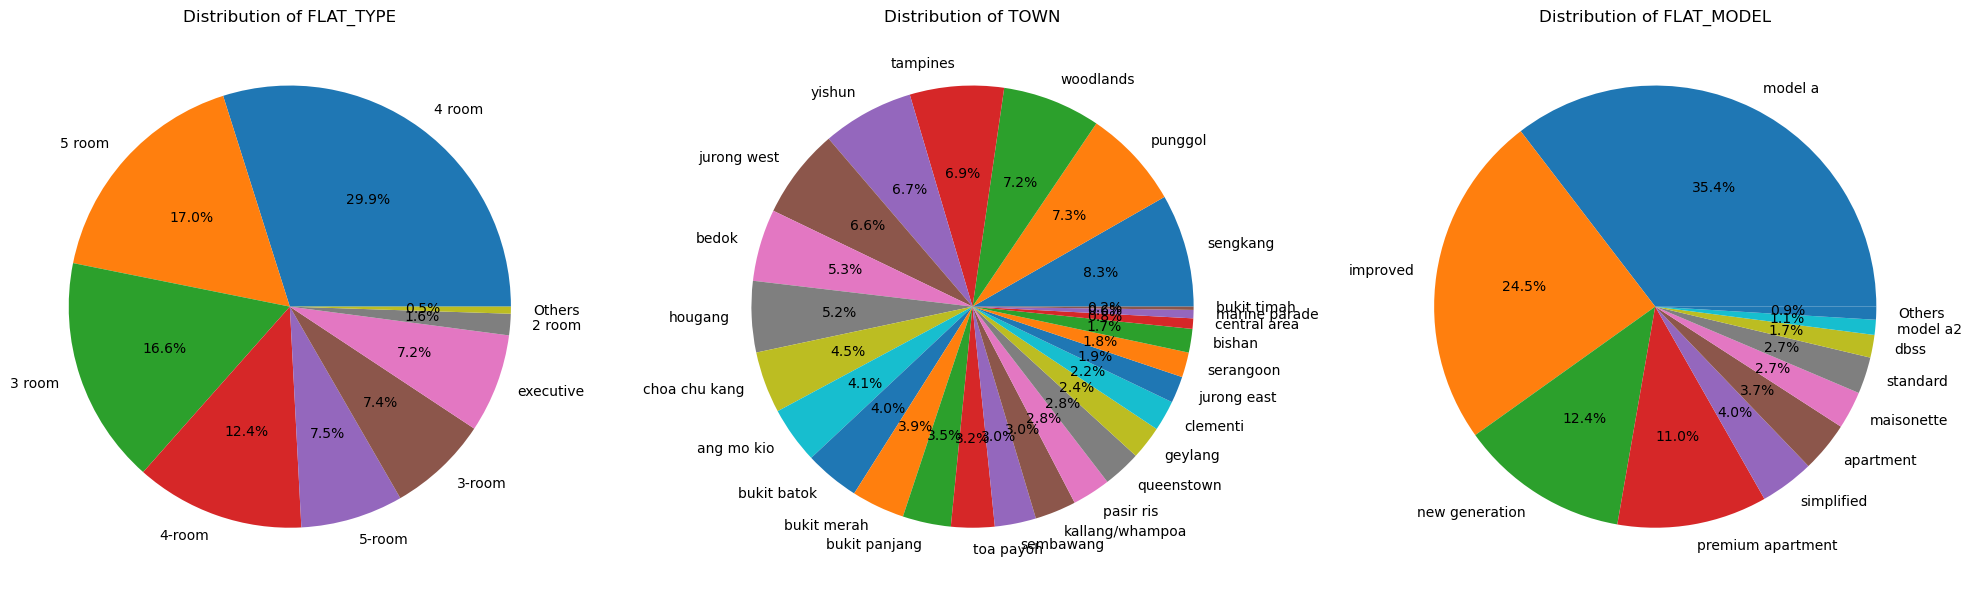


FLAT_TYPE distribution:
           count
FLAT_TYPE       
4 room     14939
5 room      8483
3 room      8307
4-room      6187
5-room      3749
3-room      3685
executive   3611
2 room       783
Others       256

TOWN distribution:
                 count
TOWN                  
sengkang          4132
punggol           3637
woodlands         3586
tampines          3435
yishun            3348
jurong west       3293
bedok             2635
hougang           2600
choa chu kang     2253
ang mo kio        2075
bukit batok       2011
bukit merah       1947
bukit panjang     1765
toa payoh         1588
sembawang         1509
kallang/whampoa   1508
pasir ris         1398
queenstown        1390
geylang           1222
clementi          1115
jurong east        974
serangoon          911
bishan             864
central area       381
marine parade      305
bukit timah        118

FLAT_MODEL distribution (after combining small categories):
                   count
FLAT_MODEL              
model a      

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
flat_type_counts = test_df['FLAT_TYPE'].value_counts()
type_percentages = flat_type_counts / len(test_df) * 100
others_mask = type_percentages < 1
if others_mask.any():
    others_sum = flat_type_counts[others_mask].sum()
    flat_type_counts = flat_type_counts[~others_mask]
    flat_type_counts['Others'] = others_sum
plt.pie(flat_type_counts.values, labels=flat_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of FLAT_TYPE')

# TOWN Distribution pie chart
plt.subplot(132)
town_counts = test_df['TOWN'].value_counts()
plt.pie(town_counts.values, labels=town_counts.index, autopct='%1.1f%%')
plt.title('Distribution of TOWN')

# MODEL Distribution pie chart (Merge small categories < 1%)
plt.subplot(133)
model_counts = test_df['FLAT_MODEL'].value_counts()
model_percentages = model_counts / len(test_df) * 100
others_mask = model_percentages < 1
if others_mask.any():
    others_sum = model_counts[others_mask].sum()
    model_counts = model_counts[~others_mask]
    model_counts['Others'] = others_sum

plt.pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Distribution of FLAT_MODEL')
plt.tight_layout()
plt.show()

# Print value counts as tables
print("\nFLAT_TYPE distribution:")
print(flat_type_counts.to_frame())
print("\nTOWN distribution:")
print(town_counts.to_frame())
print("\nFLAT_MODEL distribution (after combining small categories):")
print(model_counts.to_frame())

C:\Users\mhsms\AppData\Local\Temp\ipykernel_46924\2223606909.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FLAT_MODEL', y='PRICE_PER_SQM', data=train_df, order=order_model, palette=palette_model)


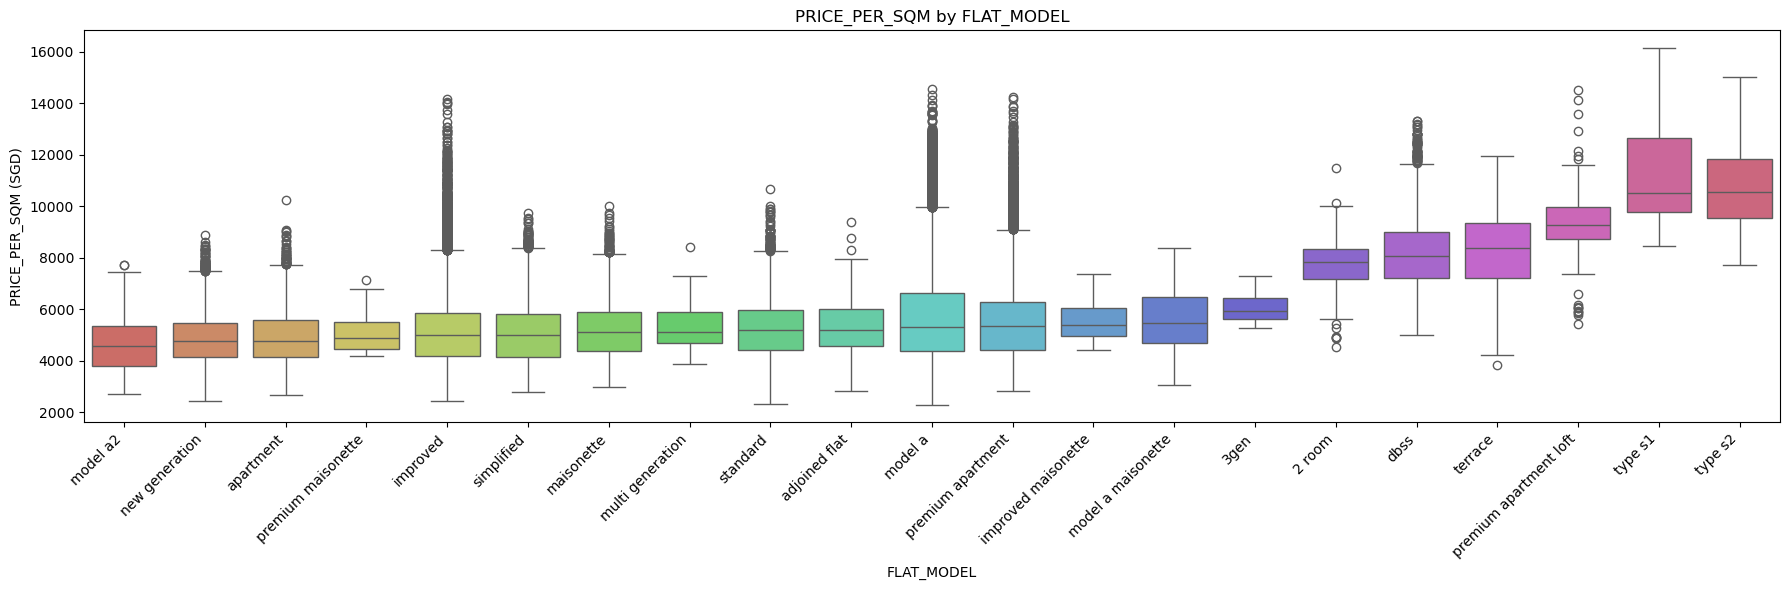

C:\Users\mhsms\AppData\Local\Temp\ipykernel_46924\2223606909.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TOWN', y='PRICE_PER_SQM', data=train_df, order=order_town, palette=palette_town)


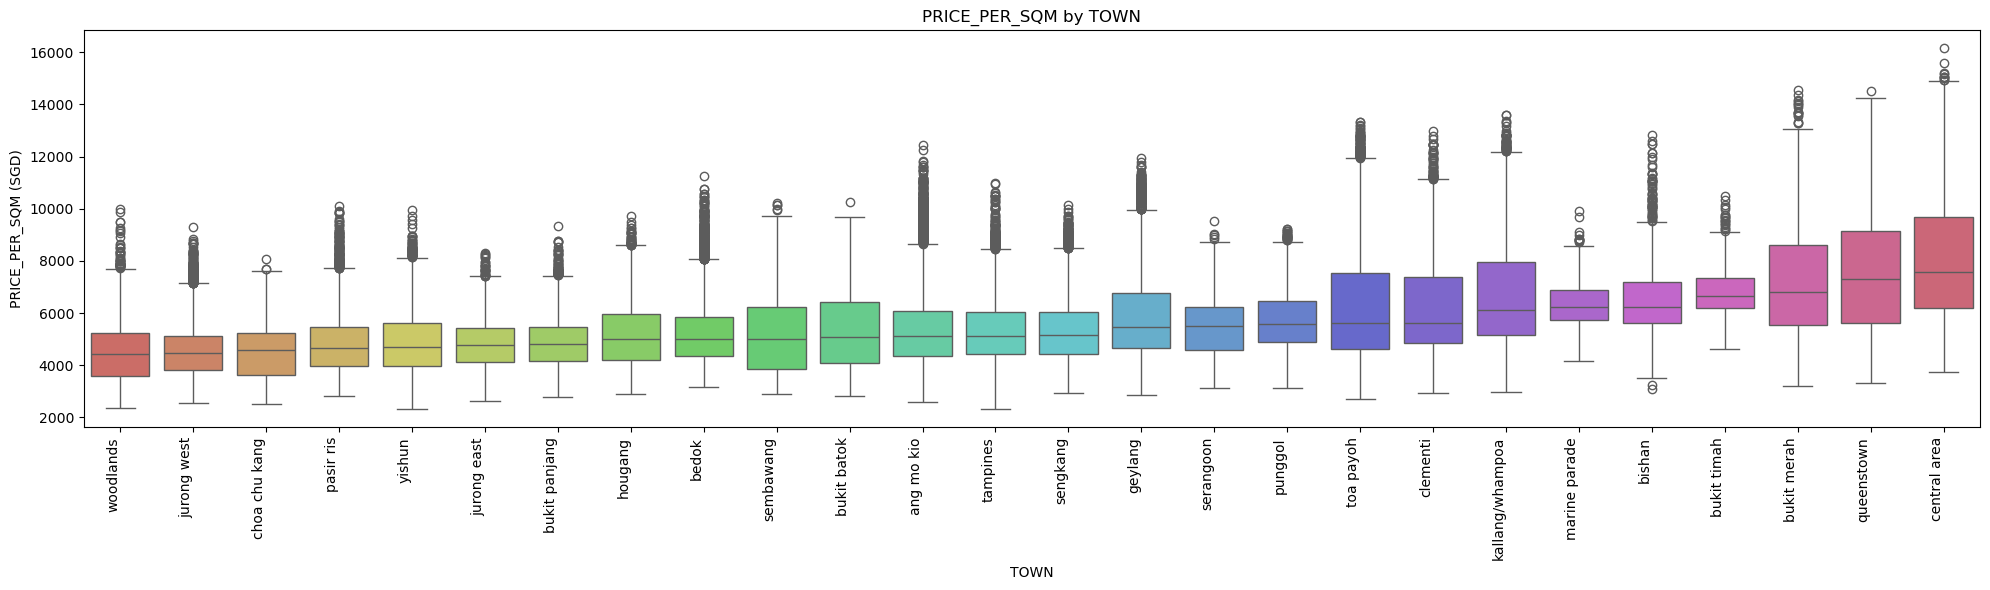

In [12]:
# PRICE_PER_SQM boxplot by FLAT_MODEL (ordered by median)
plt.figure(figsize=(18, 6))
order_model = train_df.groupby('FLAT_MODEL')['PRICE_PER_SQM'].median().sort_values().index
n_model = len(order_model)
palette_model_colors = sns.color_palette('tab20', n_colors=n_model) if n_model <= 20 else sns.color_palette('hls', n_colors=n_model)
palette_model = dict(zip(order_model, palette_model_colors))
sns.boxplot(x='FLAT_MODEL', y='PRICE_PER_SQM', data=train_df, order=order_model, palette=palette_model)
plt.title('PRICE_PER_SQM by FLAT_MODEL')
plt.xlabel('FLAT_MODEL')
plt.ylabel('PRICE_PER_SQM (SGD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# PRICE_PER_SQM boxplot by TOWN (ordered by median)
plt.figure(figsize=(20, 6))
order_town = train_df.groupby('TOWN')['PRICE_PER_SQM'].median().sort_values().index
n_town = len(order_town)
palette_town_colors = sns.color_palette('tab20', n_colors=n_town) if n_town <= 20 else sns.color_palette('hls', n_colors=n_town)
palette_town = dict(zip(order_town, palette_town_colors))
sns.boxplot(x='TOWN', y='PRICE_PER_SQM', data=train_df, order=order_town, palette=palette_town)
plt.title('PRICE_PER_SQM by TOWN')
plt.xlabel('TOWN')
plt.ylabel('PRICE_PER_SQM (SGD)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

C:\Users\mhsms\AppData\Local\Temp\ipykernel_46924\3197272700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FLAT_TYPE', y='PRICE_PER_SQM', data=train_df, order=flat_type_order, palette=colors)


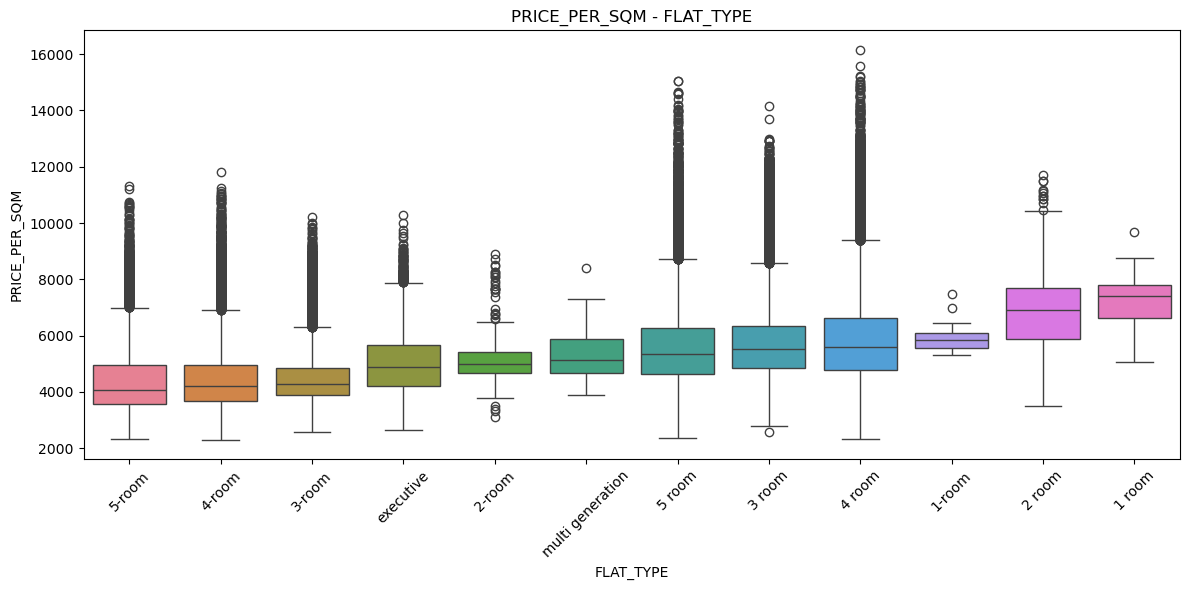

In [13]:
# PRICE_PER_SQM boxplot by TYPE (ordered by median)
flat_type_order = train_df.groupby('FLAT_TYPE')['PRICE_PER_SQM'].median().sort_values().index
plt.figure(figsize=(12, 6))
n_colors = len(flat_type_order)
colors = sns.color_palette('husl', n_colors)
sns.boxplot(x='FLAT_TYPE', y='PRICE_PER_SQM', data=train_df, order=flat_type_order, palette=colors)
plt.title('PRICE_PER_SQM - FLAT_TYPE')
plt.xlabel('FLAT_TYPE')
plt.ylabel('PRICE_PER_SQM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

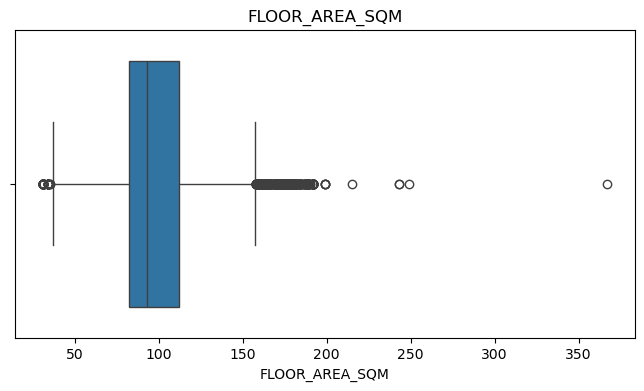

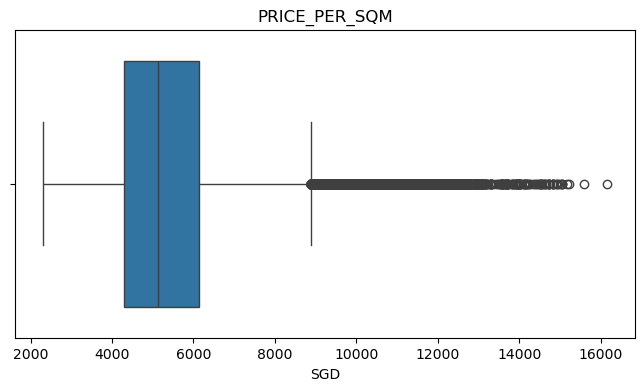

In [14]:
# FLOOR_AREA_SQM boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['FLOOR_AREA_SQM'])
plt.title('FLOOR_AREA_SQM')
plt.xlabel('FLOOR_AREA_SQM')
plt.show()

# PRICE_PER_SQM boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['PRICE_PER_SQM'])
plt.title('PRICE_PER_SQM')
plt.xlabel('SGD')
plt.show()

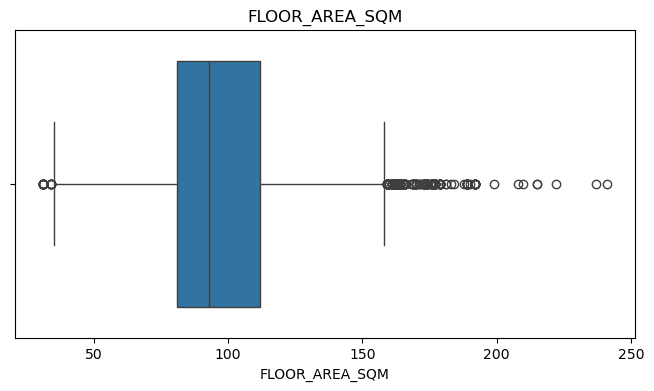

In [15]:
# FLOOR_AREA_SQM boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=test_df['FLOOR_AREA_SQM'])
plt.title('FLOOR_AREA_SQM')
plt.xlabel('FLOOR_AREA_SQM')
plt.show()

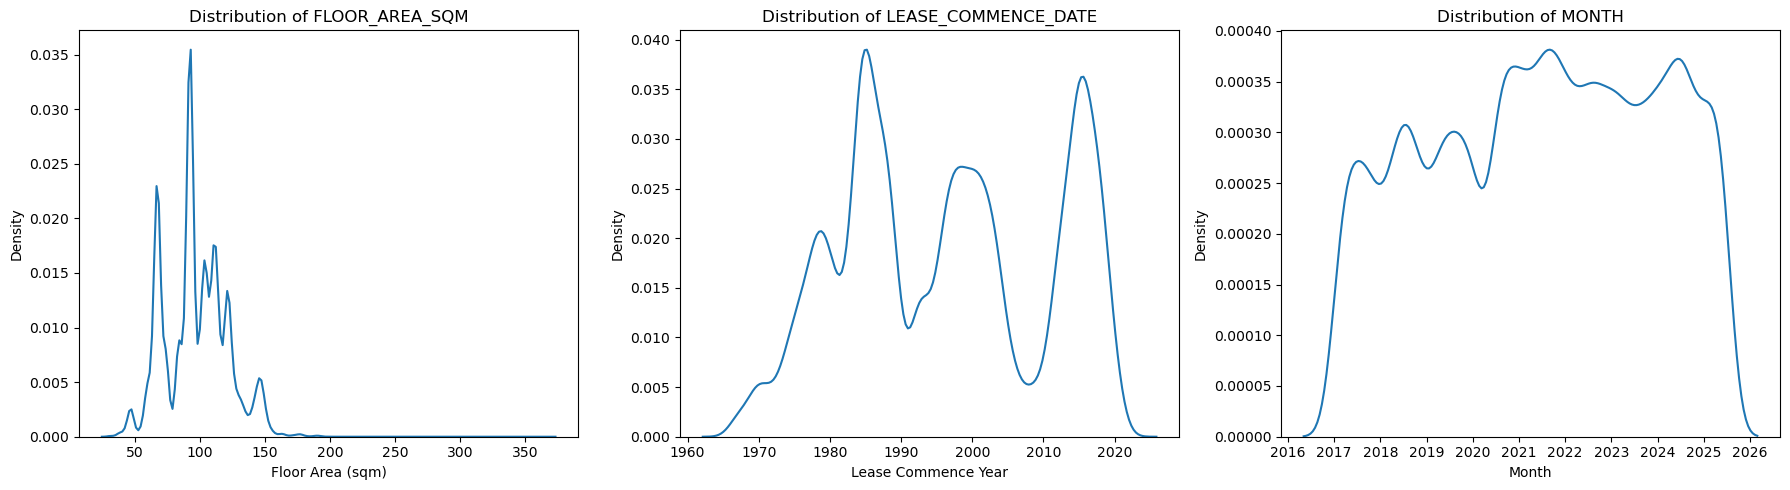

In [16]:
train_df_copy = train_df.copy()
train_df_copy['MONTH'] = pd.to_datetime(train_df_copy['MONTH'] + '-01')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# FLOOR_AREA_SQM density plot
sns.kdeplot(data=train_df['FLOOR_AREA_SQM'], ax=ax1)
ax1.set_title('Distribution of FLOOR_AREA_SQM')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Density')

# LEASE_COMMENCE_DATE density plot
sns.kdeplot(data=train_df['LEASE_COMMENCE_DATA'], ax=ax2)
ax2.set_title('Distribution of LEASE_COMMENCE_DATE')
ax2.set_xlabel('Lease Commence Year')
ax2.set_ylabel('Density')

# MONTH density plot
sns.kdeplot(data=train_df_copy['MONTH'], ax=ax3)
ax3.set_title('Distribution of MONTH')
ax3.set_xlabel('Month')
ax3.set_ylabel('Density')

plt.tight_layout()
plt.show()

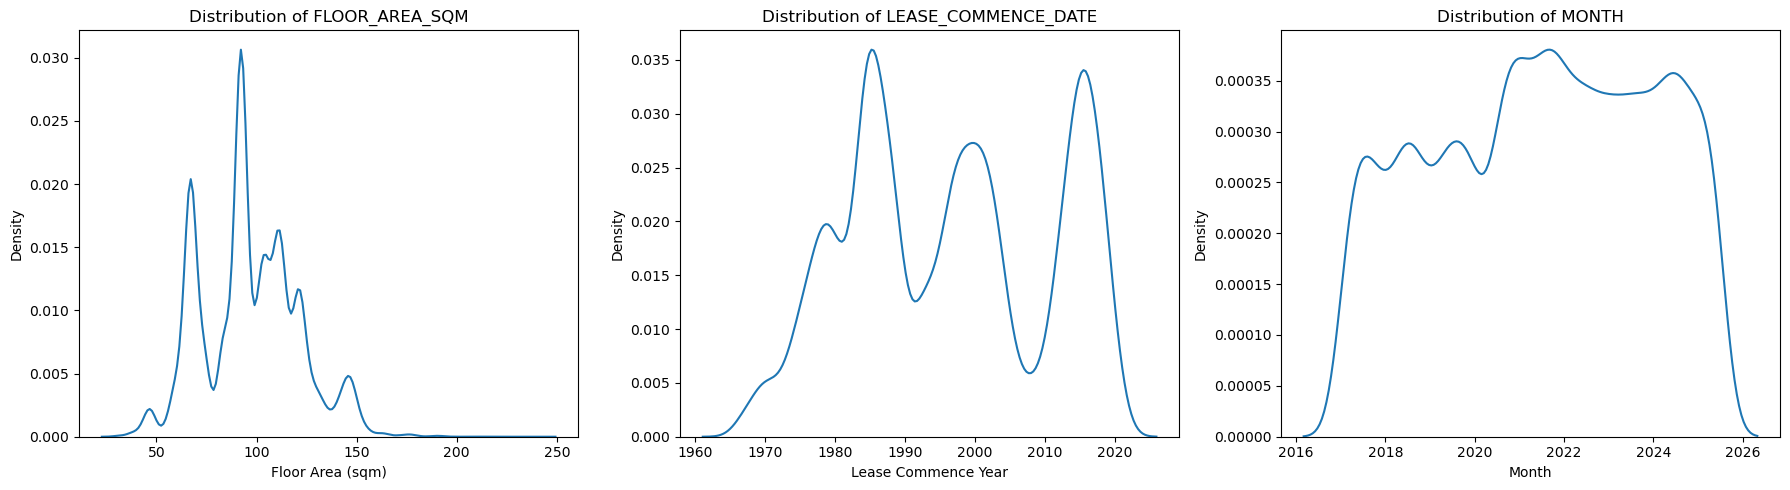

In [17]:
test_df_copy = test_df.copy()
test_df_copy['MONTH'] = pd.to_datetime(test_df_copy['MONTH'] + '-01')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# FLOOR_AREA_SQM density plot
sns.kdeplot(data=test_df['FLOOR_AREA_SQM'], ax=ax1)
ax1.set_title('Distribution of FLOOR_AREA_SQM')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Density')

# LEASE_COMMENCE_DATE density plot
sns.kdeplot(data=test_df['LEASE_COMMENCE_DATA'], ax=ax2)
ax2.set_title('Distribution of LEASE_COMMENCE_DATE')
ax2.set_xlabel('Lease Commence Year')
ax2.set_ylabel('Density')

# MONTH density plot
sns.kdeplot(data=test_df_copy['MONTH'], ax=ax3)
ax3.set_title('Distribution of MONTH')
ax3.set_xlabel('Month')
ax3.set_ylabel('Density')

plt.tight_layout()
plt.show()

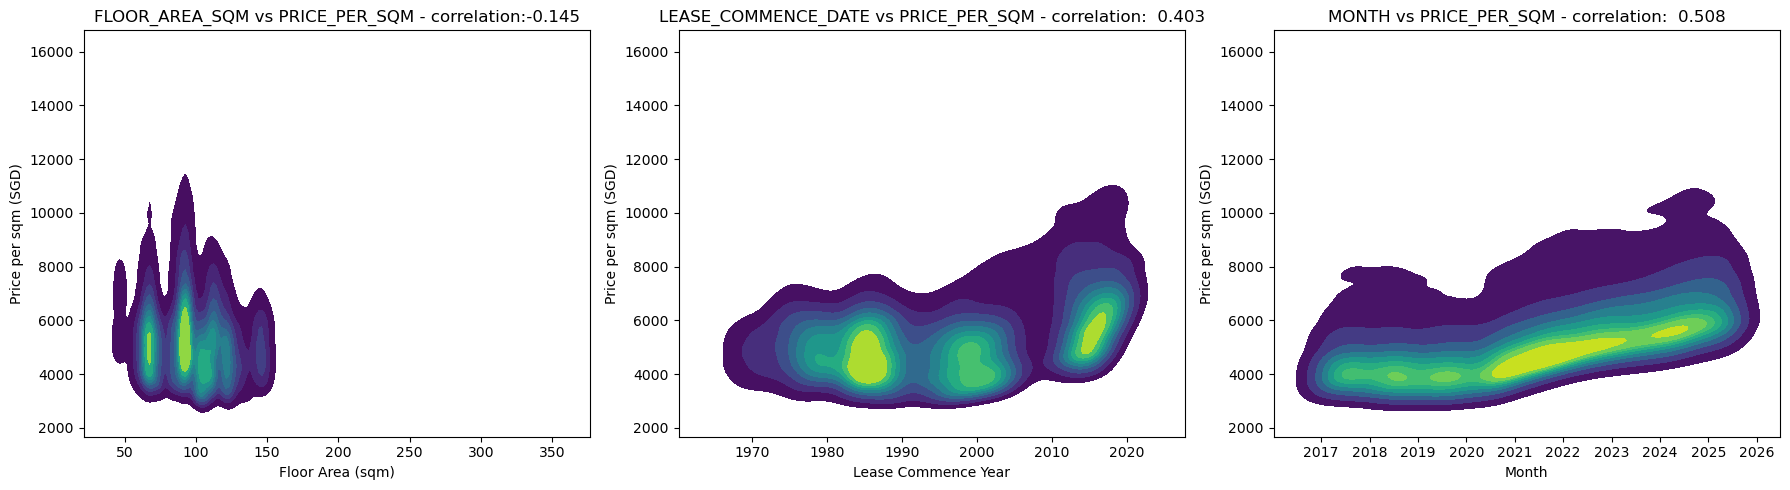

In [18]:
correlation_floor = train_df['FLOOR_AREA_SQM'].corr(train_df['PRICE_PER_SQM'])
correlation_lease = train_df['LEASE_COMMENCE_DATA'].corr(train_df['PRICE_PER_SQM'])
correlation_month = train_df_copy['MONTH'].astype(np.int64).corr(train_df_copy['PRICE_PER_SQM'])
fig = plt.figure(figsize=(18, 5))
gs = plt.GridSpec(1, 3, figure=fig)

# FLOOR_AREA_SQM vs PRICE_PER_SQM
ax1 = fig.add_subplot(gs[0, 0])
sns.kdeplot(data=train_df, x='FLOOR_AREA_SQM', y='PRICE_PER_SQM', 
            cmap='viridis', fill=True, ax=ax1)
ax1.set_title(f'FLOOR_AREA_SQM vs PRICE_PER_SQM - correlation:{correlation_floor:.3f}')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Price per sqm (SGD)')

# LEASE_COMMENCE_DATE vs PRICE_PER_SQM
ax2 = fig.add_subplot(gs[0, 1])
sns.kdeplot(data=train_df, x='LEASE_COMMENCE_DATA', y='PRICE_PER_SQM', 
            cmap='viridis', fill=True, ax=ax2)
ax2.set_title(f'LEASE_COMMENCE_DATE vs PRICE_PER_SQM - correlation:  {correlation_lease:.3f}')
ax2.set_xlabel('Lease Commence Year')
ax2.set_ylabel('Price per sqm (SGD)')

# MONTH vs PRICE_PER_SQM
ax3 = fig.add_subplot(gs[0, 2])
sns.kdeplot(data=train_df_copy, x='MONTH', y=train_df_copy['PRICE_PER_SQM'], 
            cmap='viridis', fill=True, ax=ax3)
ax3.set_title(f'MONTH vs PRICE_PER_SQM - correlation:  {correlation_month:.3f}')
ax3.set_xlabel('Month')
ax3.set_ylabel('Price per sqm (SGD)')

plt.tight_layout()
plt.show()

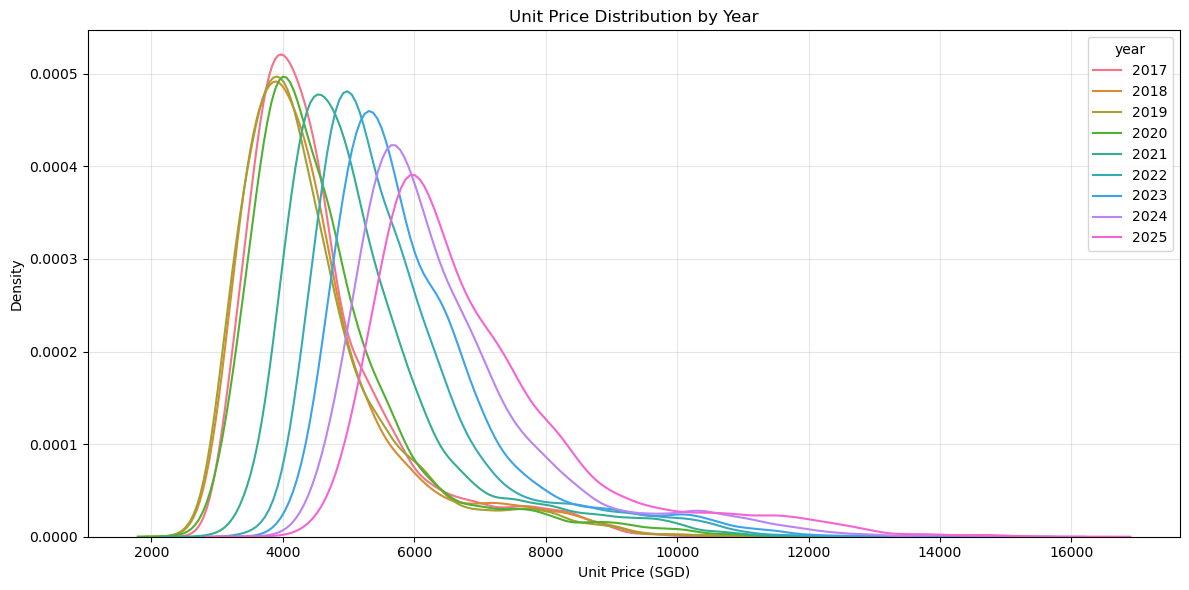

In [19]:
# Unit Price Distribution by Year
train_df_copy['YEAR'] = train_df_copy['MONTH'].dt.year
plt.figure(figsize=(12, 6))
years = sorted(train_df_copy['YEAR'].unique())
colors = sns.color_palette("husl", len(years))
for year, color in zip(years, colors):
    year_data = train_df_copy[train_df_copy['YEAR'] == year]['PRICE_PER_SQM']
    sns.kdeplot(data=year_data, label=str(year), color=color)

plt.title('Unit Price Distribution by Year')
plt.xlabel('Unit Price (SGD)')
plt.ylabel('Density')
plt.legend(title='year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

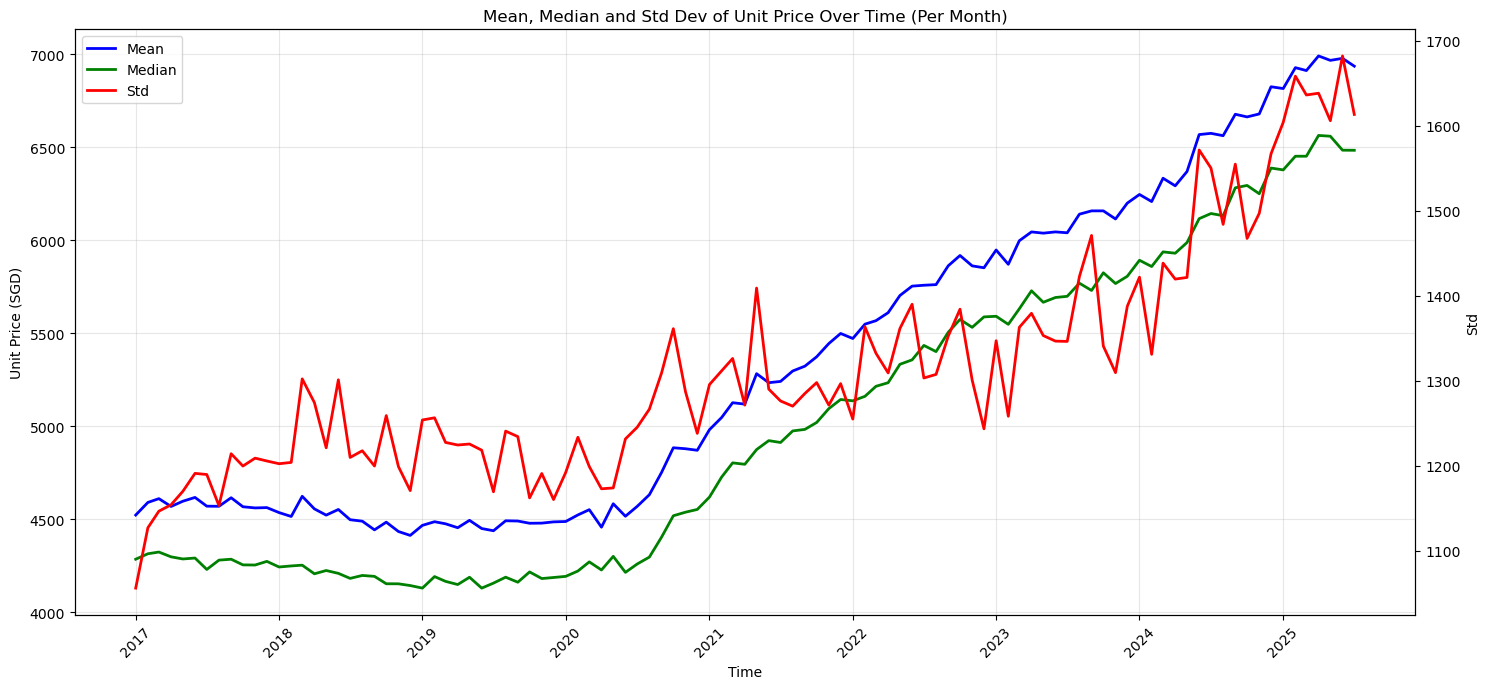

In [20]:
# Mean, Median and Std Dev of Unit Price Over Time (Per Month)
monthly_stats = train_df_copy.groupby('MONTH')['PRICE_PER_SQM'].agg(['mean', 'median', 'std']).reset_index()
monthly_stats['MONTH'] = pd.to_datetime(monthly_stats['MONTH'])
fig, ax1 = plt.subplots(figsize=(15, 7))
ax2 = ax1.twinx()
line1 = ax1.plot(monthly_stats['MONTH'], monthly_stats['mean'], label='Mean', color='blue', linewidth=2)
line2 = ax1.plot(monthly_stats['MONTH'], monthly_stats['median'], label='Median', color='green', linewidth=2)
line3 = ax2.plot(monthly_stats['MONTH'], monthly_stats['std'], label='Std', color='red', linewidth=2)
plt.title('Mean, Median and Std Dev of Unit Price Over Time (Per Month)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Unit Price (SGD)')
ax2.set_ylabel('Std')
ax1.grid(True, alpha=0.3)
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y')
plt.tight_layout()
plt.show()

In [21]:
# Drop ECO_CATEGORY column for it has only one unique value
train_df = train_df.drop(columns=['ECO_CATEGORY'])
print(train_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK              STREET FLOOR_RANGE  \
0  2020-10      woodlands    4 room  681B  woodlands drive 62    07 to 09   
1  2021-07         bishan    4 room   264    bishan street 24    07 to 09   
2  2021-05  bukit panjang    4 room   520       jelapang road    19 to 21   
3  2021-08        punggol    4 room  121B     edgedale plains    16 to 18   
4  2023-05        hougang    5 room  997B   Buangkok Crescent    10 to 12   

   FLOOR_AREA_SQM         FLAT_MODEL  LEASE_COMMENCE_DATA  RESALE_PRICE  ID  \
0           102.0  premium apartment                 2000      420000.0   1   
1           104.0            model a                 1992      585000.0   2   
2           102.0            model a                 1998      450000.0   3   
3            93.0            model a                 2017      465000.0   4   
4           113.0           improved                 2018      710000.0   5   

   PRICE_PER_SQM  
0    4117.647059  
1    5625.000000  
2    

In [22]:
# Drop ECO_CATEGORY column for it has only one unique value
test_df = test_df.drop(columns=['ECO_CATEGORY'])
print(test_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK            STREET FLOOR_RANGE  \
0  2025-06      sembawang    3 room  115D     Canberra Walk    04 to 06   
1  2020-01    bukit merah    4 room  118A     jalan membina    01 to 03   
2  2025-06         bishan    3 room    22     Sin Ming Road    10 to 12   
3  2022-10        hougang    4 room   635  Hougang Avenue 8    10 to 12   
4  2024-02  bukit panjang    4 room   275      bangkit road    10 to 12   

   FLOOR_AREA_SQM  FLAT_MODEL  LEASE_COMMENCE_DATA  ID  
0            68.0     model a                 2018   1  
1            90.0     model a                 2003   2  
2            68.0    improved                 1973   3  
3            84.0  simplified                 1987   4  
4           104.0     model a                 1988   5  


In [23]:
# calculate average floor from floor range
def calc_floor_avg(floor_range):
    try:
        start, end = floor_range.split(' to ')
        return (int(start) + int(end)) / 2
    except:
        return None

In [24]:
train_df['FLOOR_AVG'] = train_df['FLOOR_RANGE'].apply(calc_floor_avg)
print(train_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK              STREET FLOOR_RANGE  \
0  2020-10      woodlands    4 room  681B  woodlands drive 62    07 to 09   
1  2021-07         bishan    4 room   264    bishan street 24    07 to 09   
2  2021-05  bukit panjang    4 room   520       jelapang road    19 to 21   
3  2021-08        punggol    4 room  121B     edgedale plains    16 to 18   
4  2023-05        hougang    5 room  997B   Buangkok Crescent    10 to 12   

   FLOOR_AREA_SQM         FLAT_MODEL  LEASE_COMMENCE_DATA  RESALE_PRICE  ID  \
0           102.0  premium apartment                 2000      420000.0   1   
1           104.0            model a                 1992      585000.0   2   
2           102.0            model a                 1998      450000.0   3   
3            93.0            model a                 2017      465000.0   4   
4           113.0           improved                 2018      710000.0   5   

   PRICE_PER_SQM  FLOOR_AVG  
0    4117.647059        8.0  
1 

In [25]:
test_df['FLOOR_AVG'] = test_df['FLOOR_RANGE'].apply(calc_floor_avg)
print(test_df.head())

     MONTH           TOWN FLAT_TYPE BLOCK            STREET FLOOR_RANGE  \
0  2025-06      sembawang    3 room  115D     Canberra Walk    04 to 06   
1  2020-01    bukit merah    4 room  118A     jalan membina    01 to 03   
2  2025-06         bishan    3 room    22     Sin Ming Road    10 to 12   
3  2022-10        hougang    4 room   635  Hougang Avenue 8    10 to 12   
4  2024-02  bukit panjang    4 room   275      bangkit road    10 to 12   

   FLOOR_AREA_SQM  FLAT_MODEL  LEASE_COMMENCE_DATA  ID  FLOOR_AVG  
0            68.0     model a                 2018   1        5.0  
1            90.0     model a                 2003   2        2.0  
2            68.0    improved                 1973   3       11.0  
3            84.0  simplified                 1987   4       11.0  
4           104.0     model a                 1988   5       11.0  


In [26]:
# set random seed for reproducibility
np.random.seed(42)
val_size = 50000
valid_df = train_df.sample(n=val_size, random_state=42)
train_df = train_df.drop(valid_df.index)
print(f"len of train dataset: {len(train_df)}")
print(f"len of valid dataset: {len(valid_df)}")

len of train dataset: 112691
len of valid dataset: 50000


Process outlier.

In [28]:
train_df['ZSCORE_PPS'] = train_df.groupby('FLAT_TYPE')['PRICE_PER_SQM'].transform(
    lambda x: (x - x.mean()) / x.std())

train_df['ZSCORE_AREA'] = train_df.groupby('FLAT_TYPE')['FLOOR_AREA_SQM'].transform(
    lambda x: (x - x.mean()) / x.std())

z_score_threshold = 3
outliers = train_df[
    (train_df['ZSCORE_PPS'].abs() > z_score_threshold) |
    (train_df['ZSCORE_AREA'].abs() > z_score_threshold)
]

if not outliers.empty:
    print(outliers.round(2))
else:
    print("No outliers detected in the current threshold.")
print("\n")

train_df_cleaned = train_df.drop(outliers.index).reset_index(drop=True)
train_df_cleaned = train_df_cleaned.drop(columns=['ZSCORE_PPS', 'ZSCORE_AREA'])
print(train_df_cleaned.head())

          MONTH             TOWN  FLAT_TYPE BLOCK               STREET  \
73      2025-06  kallang/whampoa     4 room   26B  saint george's lane   
138     2024-10         clementi     4 room  311A    Clementi Avenue 4   
188     2017-10      bukit merah     3-room    55        Havelock Road   
193     2024-09        toa payoh     3 room   262       Toa Payoh East   
280     2024-07        toa payoh     5 room  139A  lorong 1a toa payoh   
...         ...              ...        ...   ...                  ...   
162265  2018-03       queenstown     4-room   18D        Holland Drive   
162330  2021-06       ang mo kio     3 room   301  ang mo kio avenue 3   
162422  2025-04           bishan     5 room  275A     bishan street 24   
162493  2017-11        woodlands  executive   847  woodlands street 82   
162538  2022-04      bukit merah     5 room   126     bukit merah view   

       FLOOR_RANGE  FLOOR_AREA_SQM      FLAT_MODEL  LEASE_COMMENCE_DATA  \
73        19 to 21            92.0  

In [29]:
# FLAT_TYPE based average PRICE_PER_SQM encoding
price_ranking_map = train_df_cleaned.groupby('FLAT_TYPE')['PRICE_PER_SQM'].mean()
print(price_ranking_map)
train_df_cleaned['AVG_TYPE_PPS'] = train_df_cleaned['FLAT_TYPE'].map(price_ranking_map)
print(train_df_cleaned[['FLAT_TYPE', 'AVG_TYPE_PPS', 'PRICE_PER_SQM']].head())

FLAT_TYPE
1 room              7380.500645
1-room              5882.296774
2 room              6848.356973
2-room              5013.182185
3 room              5672.542356
3-room              4400.732817
4 room              5855.729951
4-room              4473.572453
5 room              5494.190033
5-room              4413.616072
executive           4974.674226
multi generation    5214.749492
Name: PRICE_PER_SQM, dtype: float64
  FLAT_TYPE  AVG_TYPE_PPS  PRICE_PER_SQM
0    4 room   5855.729951    5625.000000
1    4 room   5855.729951    4411.764706
2    4 room   5855.729951    5000.000000
3    4 room   5855.729951    6483.516484
4    3 room   5672.542356    4823.529412


In [30]:
# FLAT_TYPE based average PRICE_PER_SQM encoding
valid_df['AVG_TYPE_PPS'] = valid_df['FLAT_TYPE'].map(price_ranking_map)
print(train_df_cleaned[['FLAT_TYPE', 'AVG_TYPE_PPS']].head())

  FLAT_TYPE  AVG_TYPE_PPS
0    4 room   5855.729951
1    4 room   5855.729951
2    4 room   5855.729951
3    4 room   5855.729951
4    3 room   5672.542356


In [31]:
# FLAT_TYPE based average PRICE_PER_SQM encoding
test_df['AVG_TYPE_PPS'] = test_df['FLAT_TYPE'].map(price_ranking_map)
print(train_df_cleaned[['FLAT_TYPE', 'AVG_TYPE_PPS']].head())

  FLAT_TYPE  AVG_TYPE_PPS
0    4 room   5855.729951
1    4 room   5855.729951
2    4 room   5855.729951
3    4 room   5855.729951
4    3 room   5672.542356


In [33]:
# STREET based average PRICE_PER_SQM encoding
street_avg_prices = train_df_cleaned.groupby('STREET')['PRICE_PER_SQM'].mean()
train_df_cleaned['AVG_STREET_PPS'] = train_df_cleaned['STREET'].map(street_avg_prices)
print(street_avg_prices,'\n')
print(train_df_cleaned[['STREET', 'AVG_STREET_PPS', 'PRICE_PER_SQM']].head())

STREET
Admiralty Drive      4300.275239
Admiralty Link       4140.495669
Ah Hood Road         5908.010430
Aljunied Crescent    5217.827691
Aljunied Road        5288.075561
                        ...     
yung kuang road      5862.091728
yung loh road        4422.722250
yung ping road       4580.185752
yung sheng road      4336.609937
zion road            7525.914980
Name: PRICE_PER_SQM, Length: 1135, dtype: float64 

              STREET  AVG_STREET_PPS  PRICE_PER_SQM
0   bishan street 24     7072.955861    5625.000000
1      jelapang road     4667.961101    4411.764706
2    edgedale plains     5491.635914    5000.000000
3  clementi avenue 5     5380.633903    6483.516484
4         Fajar Road     4657.930828    4823.529412


In [34]:
# STREET based average PRICE_PER_SQM encoding
valid_df['AVG_STREET_PPS'] = valid_df['STREET'].map(street_avg_prices)
print(valid_df[['STREET', 'AVG_STREET_PPS']].head())

                        STREET  AVG_STREET_PPS
129519        yishun street 11     4511.584579
152278           canberra road     4448.783359
24147    jurong west street 42     4287.539499
129600   jurong west street 65     4714.357135
107857  choa chu kang avenue 2     4011.244831


In [35]:
# 将平均房价映射回原数据框，创建新的AVG_STREET_PRICE字段
test_df['AVG_STREET_PPS'] = test_df['STREET'].map(street_avg_prices)
print(test_df[['STREET', 'AVG_STREET_PPS']].head())

             STREET  AVG_STREET_PPS
0     Canberra Walk     6590.257139
1     jalan membina     8475.729888
2     Sin Ming Road     4681.016392
3  Hougang Avenue 8     4784.924881
4      bangkit road     4209.034955


In [36]:
train_df_cleaned['SPECIAL_MODEL'] = train_df_cleaned['FLAT_MODEL'].isin(['2 room','dbss','terrace','','type s1', 'type s2','premium apartment loft'])
print("\n Distribution of special_model")
print(train_df_cleaned['SPECIAL_MODEL'].value_counts())


 Distribution of special_model
SPECIAL_MODEL
False    108228
True       1795
Name: count, dtype: int64


In [37]:
valid_df['SPECIAL_MODEL'] = valid_df['FLAT_MODEL'].isin(['2 room','dbss','terrace','','type s1', 'type s2','premium apartment loft'])
print("\n Distribution of special_model")
print(valid_df['SPECIAL_MODEL'].value_counts())


 Distribution of special_model
SPECIAL_MODEL
False    48932
True      1068
Name: count, dtype: int64


In [38]:
test_df['SPECIAL_MODEL'] = test_df['FLAT_MODEL'].isin(['2 room','dbss','terrace','','type s1', 'type s2','premium apartment loft'])
print("\n Distribution of special_model")
print(test_df['SPECIAL_MODEL'].value_counts())


 Distribution of special_model
SPECIAL_MODEL
False    48914
True      1086
Name: count, dtype: int64


In [39]:
cols_middle = [c for c in train_df_cleaned.columns if c not in ('ID', 'PRICE_PER_SQM')]
cols = ['ID'] + cols_middle + ['PRICE_PER_SQM']
train_df_cleaned = train_df_cleaned[cols]
train_df_cleaned.to_csv('train_cleaned_wo_valid.csv', index=False)
print("Cleaned data saves at train_cleaned_wo_valid.csv")

Cleaned data saves at train_cleaned_wo_valid.csv


In [40]:
cols_middle = [c for c in valid_df.columns if c not in ('ID')]
cols = ['ID'] + cols_middle
valid_df = valid_df[cols]
valid_df.to_csv('valid_cleaned.csv', index=False)
print("Cleaned data saves at valid_cleaned.csv")

Cleaned data saves at valid_cleaned.csv


In [41]:
cols_middle = [c for c in test_df.columns if c not in ('ID')]
cols = ['ID'] + cols_middle
test_df = test_df[cols]
test_df.to_csv('test_cleaned.csv', index=False)
print("Cleaned data saves at test_cleaned.csv")

Cleaned data saves at test_cleaned.csv
